In [111]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
import random
import tkinter as tk
from tkinter import *

In [150]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr,cr)

In [113]:
def get_gates_random(n):
    gate_type = ["H", "I", "X", "Y", "Z"]
    sqe = list(range(0, n))
    return(random.choice(gate_type), random.choice(sqe))

In [207]:
def options_gate(n):
    # n is the number of qubits of interest
    global one
    global two
    
    one = get_gates_random(n)
    two = get_gates_random(n)
    
    return(one,two)

In [124]:
## This is the function of interest

def gate_apply(user_input, n):
    if(user_input) == "I":
        print("none")
    if(user_input) == "X":
        circ.x(qr[n])
    if(user_input) == "Y":
        circ.y(qr[n])
    if(user_input) == "Z":
        circ.z(qr[n])
    if(user_input) == "H":
        circ.h(qr[n])

In [208]:
options_gate(2)
master = Tk()
user_input = Entry(master)

In [209]:
def ButtonOneCallback():
    value = user_input.get()
    gate_apply(one[0], one[1])

def ButtonTwoCallback():
    value = user_input.get()
    gate_apply(two[0], two[1])
    

button1 = Button(master, text= one, command=ButtonOneCallback)
button1.pack()
button2 = Button(master, text= two, command=ButtonTwoCallback)
button2.pack()
mainloop()

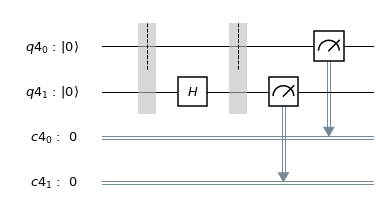

In [127]:
circ.barrier(qr[0], qr[1])
circ.measure(qr,cr)
circ.draw(output = 'mpl')

Choose gate:X
Choose qubit:1
Choose gate:Y
Choose qubit:0


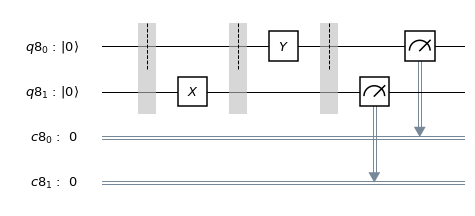

In [131]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr,cr)
circ.barrier(qr[0], qr[1])

gate_choice = input("Choose gate:")
qubit_choice = input("Choose qubit:")
gate_apply(gate_choice, n = int(qubit_choice))
circ.barrier(qr[0], qr[1])
gate_choice = input("Choose gate:")
qubit_choice = input("Choose qubit:")
gate_apply(gate_choice, n = int(qubit_choice))
circ.barrier(qr[0], qr[1])
circ.measure(qr,cr)
circ.draw(output = 'mpl')

In [342]:
# for executing an arbitrary number of gates per user specifications


def mysplitnum(s):
    head = s.rstrip('0123456789')
    tail = s[len(head):]
    return int(tail)

def mysplittxt(s):
    head = s.rstrip('0123456789')
    tail = s[len(head):]
    return head

def create_circuit(n):
    #n is number of gates
    circ.measure(qr,cr)
    for i in range(0, n):
        
        # make gate entry H1 or Z0 for example
        gate_sel = input("Choose gate:")
        # gate_choice = input("Choose gate:")
        # qubit_choice = input("Choose qubit:")
        gate_apply(mysplittxt(gate_sel), mysplitnum(gate_sel))
        circ.barrier(qr)
        circ.measure(qr,cr)

Choose gate:H0
Choose gate:H0
Choose gate:H0
Choose gate:H0


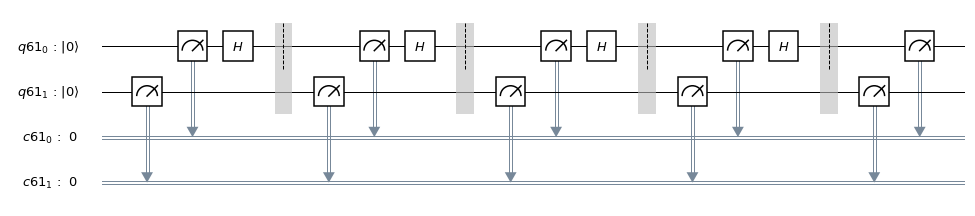

In [343]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr,cr)
#circ.measure(qr,cr)
create_circuit(4)
circ.draw(output = 'mpl')



In [227]:
# Use the BasicAer qasm_simulator backend
from qiskit import BasicAer
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, running it 1000 times.
job_sim = execute(circ, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)

{'00000': 128, '01100': 133, '01110': 112, '01010': 124, '01000': 124, '00100': 120, '00110': 134, '00010': 125}


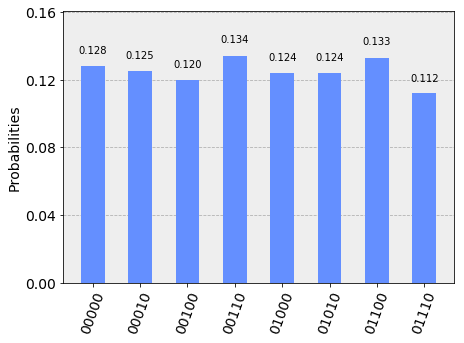

In [228]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)


In [218]:
# Use the BasicAer statevector_simulator backend
from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

# Execute the circuit on the state vector simulator
job_sim = execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector in a manner that contains a comma-delimited string.
quantum_state

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [287]:
def callback(number):
    print("button", number)
    print("done!")

Button(text="one",   command=lambda: callback(1)).pack()
Button(text="two",   command=lambda: callback(2)).pack()
Button(text="three", command=lambda: callback(3)).pack()



button 3
done!


KeyboardInterrupt: 

In [290]:
from tkinter import *

class Program:

    def __init__(self):
        b = Button(text="click me", command = self.callback)
        b.pack()

    def callback(self):
        print("clicked!")

program = Program()

mainloop()

clicked!


KeyboardInterrupt: 